<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/dl-handson/blob/master/PRACTICA_APAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# ACERCA DE LA PRÁCTICA
### Estructura 
- Tiene 6 apartados o preguntas (A, B, C, D, E, F)
- Hay cuestiones que deben ser contestadas en texto. Edita las celdas que contienen el enunciado y responde a continuación de la indicación 'RESPUESTA', escribiendo directamente.
 - **RESPUESTA:**
- Para responder a otras cuestiones, deberás crear tú las celdas para insertar código.

### Puntuación
- La puntuación por apartados es la siguiente:
 - A: 2.00 puntos 
 - B: 1.50 puntos (0.50 + 0.50 + 0.50)
 - C: 1.50 puntos (0.50 + 1.00)
 - D: 1.50 puntos (0.50 + 0.50 + 0.50)
 - E: 1.50 puntos (0.50 + 0.50 + 0.50))
 - F: 2.00 puntos 

## 0. Preparación del entorno y comprobación de requisitos

In [34]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
SUBFOLDER = "L06cifar"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", SUBFOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Información de versiones

In [2]:
print(tf.__version__)
print(keras.__version__)

2.4.2
2.4.0


### Comprobar si disponemos de una GPU

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. Redes neuronales convolucionales en Keras
### Apartado A)
- **(2.00 puntos)** Escribe en keras una red neuronal convolucional similar a la propuesta por LeCun-5, en la imagen. Ten en cuenta las siguientes consideraciones:
 - En la figura, no está representada la capa `Flatten()`
 - LeCun utilizaba `tanh` como función de activación
 - Las capas de _pooling_ no calculaban el máximo de los valores, sino la media.
- Representa gráficamente con alguna función de `Keras` la red construida para comprobar que tiene la forma de la imagen. ¿Cuántos parámetros entrenables tiene la red?
   - **RESPUESTA**: 

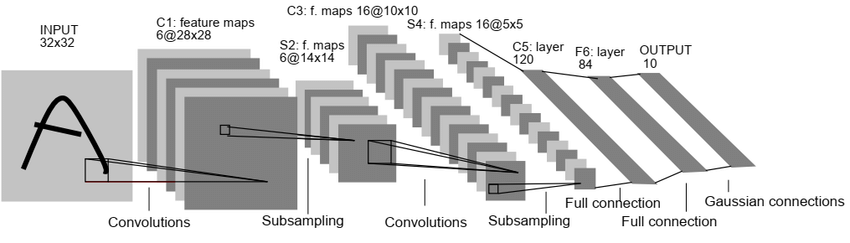

## 2. Dataset

No vamos a trabajar con el dataset MNIST, sino con `keras.datasets.cifar10`, que se puede cargar desde Keras del mismo que MNIST y Fashion MNIST. En él, puedes encontrar imágenes en color (RGB) de las siguientes categorías.

In [13]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### **Apartado B1)**
- **(0.50 puntos)** Carga el dataset y utiliza el 10% de las muestras de train para generar el set de validación, barajeando las muestras. ¿Cuántas imágenes se van a utilizar para train, validación y test? Averigua el tamaño de los tensores.
    - **RESPUESTA:**

### Apartado B2)
- **(0.50 puntos)** Muestra los valores numéricos de una de las imágenes y escribe una función en Python `def show_example(image,label)`, que facilite mostrar una imagen y su etiqueta verdadera. 
 - Una vez definida la función muestra una imagen del set de train y una del set de validación.

### Apartado B3)
- **(0.50 puntos)** Imprime en pantalla algunos de los valores numéricos de una de las imágenes. A continuación, realiza un estandarización de las imágenes y justifica por qué es conveniente.
 - **RESPUESTA:**

## 3. Adaptando la red neuronal a las entradas

### Apartado C)
- **(0.50 puntos)** Comprueba las dimensiones de los tensores que vas a introducir a la red neuronal. ¿Son las dimensiones adecuadas para introducirlas en una red convolucional? ¿y en la red LeNet-5 que definiste en el Apartado A)? ¿por qué?
    - **RESPUESTA:**
- **(1.00 puntos)** Adapta la red neuronal similar a LeCun-5 que definiste previamente:
   - A fin de que acepte como entradas las imágenes en color.
   - Utilizando _Max Pooling_
   - Cambiando las activaciones `tanh` por alguna función de activación variante de _ReLU_ en las capas convolucionales y por funciones de activación tipo _ReLU_ en las capas _fully_connected_.

## 4. Entrenando la red neuronal

### Apartado D1)
- **(0.50 puntos)** Entrena la red neuronal utilizando un optimizador adaptativo distinto de Stochastic Gradient Descent. Muestra una gráfica de la evolución del entrenamiento (loss/epochs) y (accuracy/epochs).

### Apartado D2)
- **(0.50 puntos)** Introduce un par de técnicas de regularización en la red para evitar el sobre-entrenamiento y explica muy brevemente en qué consiste cada una de ellas. Si las técnicas utilizan algún parámetro o hiperparámetro, explica qué representan.
 - **RESPUESTA:**

### Apartado D3)
- **(0.50 puntos)** Entra nuevamente la red neuronal, esta vez utilizando un _callback_ para imprimir una métrica que permita observar si se está produciendo _overfitting_. Muestra nuevamente la evolución del entrenamiento en una gráfica.

## 5. Haciendo inferencia con la red entrenada

Antes de continuar salvar la red entrenada a disco y vuelve a cargarla. Si tienes que trabajar varios días en el notebook, descarga a tu ordenador el archivo de la red entrenada. 

### Apartado E1)
- **(0.50 puntos)** Muestra la matriz de confusión sin normalizar y calcula los FP y FN de la clase 'automobile'.

### Apartado E2)
- **(0.50 puntos)** Calcula las métricas _sensitivity/recall_, _specificity_ y _accuracy_ para todas las clases. ¿Cuál ha sido la clase que menor _sensitivity_ ha obtenido?, ¿cuál ha sido la que ha obtenido mayor _specificity_?. Mirando las ecuaciones y la matriz de confusión, ¿sabes explicar cuál ha sido la causa?
 - **RESPUESTA:**

### Apartado E3)
- **(0.50 puntos)** Escribe una función `def show_prediction(image,label)` que realice la misma tarea que la función `show_example()` que definiste antes, pero que además muestre en pantalla la predicción realizada por la red neuronal para esa imagen. Realiza una predicción sobre 3 imágenes del set de test e imprime predicción. Muestra esas imágenes por pantalla, junto con la etiqueta correcta. ¿Ha sido correcta la predicción?. 
  - **RESPUESTA:**


## 6. Consiguiendo una mejor red
### Apartado F)
- **(3.00 puntos)** A continuación, trata de conseguir una red mejor. Puedes poner en práctica todo lo que has aprendido. ¡Demuestra lo que sabes!. 
  - Puedes probar distintos tamaños de red y técnicas de entrenamiento. 
  - Puedes incluir comentarios acerca de lo que has hecho a continuación o incluirlos en celdas más abajo.
  - Compara tus resultados con los obtenidos en los apartados E1), E2 y E3)
      - **RESPUESTA:**